In [19]:
# importing the dependencie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [9]:
# fetching dataset
df = pd.read_csv("c:\\Users\\marta\\Downloads\\car.csv")
print(df.head())
print(df.describe())
print(df.info())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   

In [10]:
# Check for missing values
print(df.isnull().sum())

# Dropping or filling missing values (Example)
df.dropna(inplace=True)  # Drops rows with missing values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [11]:

# Selecting relevant features
features = ['name', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']

# Extracting the selected features
X = df[features]
print(X)

                                     name  selling_price  km_driven    fuel  \
0                           Maruti 800 AC          60000      70000  Petrol   
1                Maruti Wagon R LXI Minor         135000      50000  Petrol   
2                    Hyundai Verna 1.6 SX         600000     100000  Diesel   
3                  Datsun RediGO T Option         250000      46000  Petrol   
4                   Honda Amaze VX i-DTEC         450000     141000  Diesel   
...                                   ...            ...        ...     ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)         409999      80000  Diesel   
4336           Hyundai i20 Magna 1.4 CRDi         409999      80000  Diesel   
4337                  Maruti 800 AC BSIII         110000      83000  Petrol   
4338     Hyundai Creta 1.6 CRDi SX Option         865000      90000  Diesel   
4339                     Renault KWID RXT         225000      40000  Petrol   

     seller_type transmission         owner  
0    

C:\Users\marta\AppData\Local\Temp\ipykernel_30380\3855612158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='fuel', y='selling_price', palette='viridis')


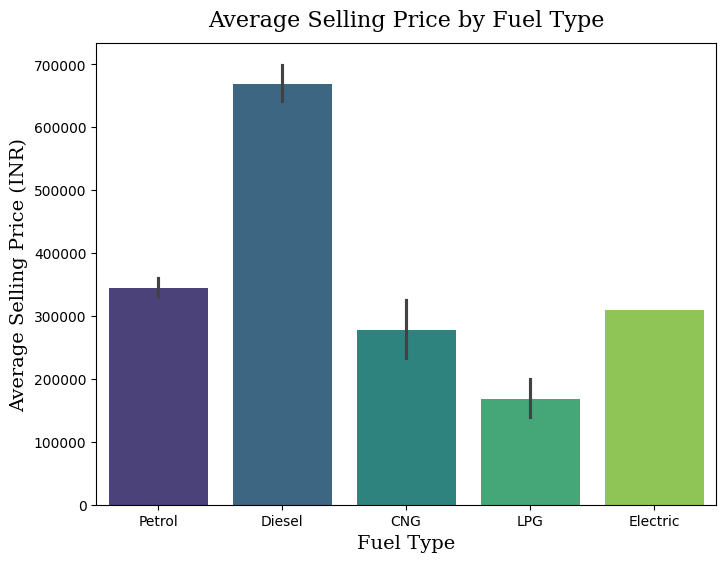

In [12]:
#Creating a bar plot showing the average selling price for each fuel type
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='fuel', y='selling_price', palette='viridis')

#Customize the labels and title
plt.xlabel('Fuel Type', fontsize=14, family='serif')
plt.ylabel('Average Selling Price (INR)', fontsize=14, family='serif')
plt.title('Average Selling Price by Fuel Type', fontsize=16, family='serif', pad=12)
plt.show()

C:\Users\marta\AppData\Local\Temp\ipykernel_30380\758209403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=df, x='fuel', y='selling_price', palette='viridis', markers='o')


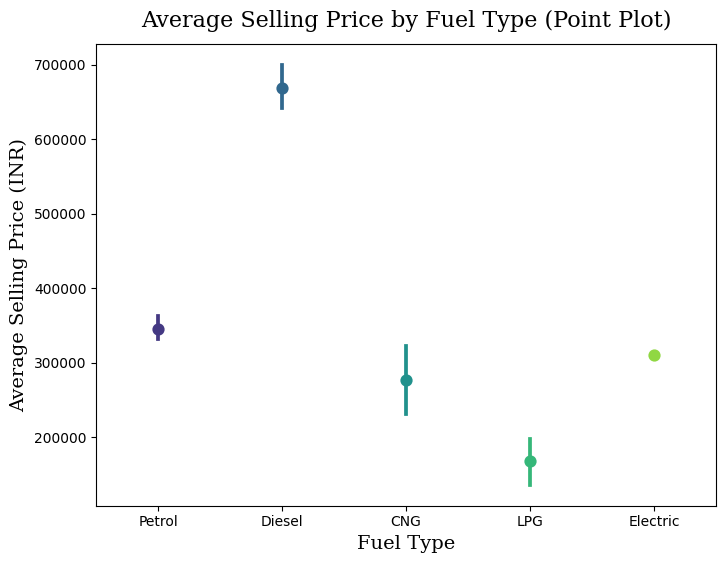

In [13]:
#Creating a point plot showing the average selling price for each fuel type
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='fuel', y='selling_price', palette='viridis', markers='o')

# Customize the labels and title
plt.xlabel('Fuel Type', fontsize=14, family='serif')
plt.ylabel('Average Selling Price (INR)', fontsize=14, family='serif')
plt.title('Average Selling Price by Fuel Type (Point Plot)', fontsize=16, family='serif', pad=12)
plt.show()

C:\Users\marta\AppData\Local\Temp\ipykernel_30380\1140913122.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


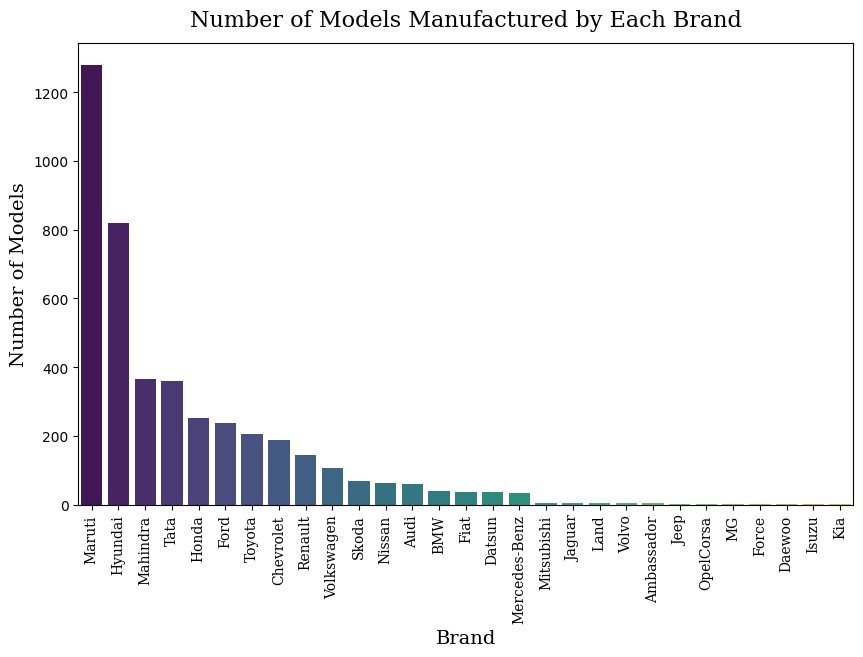

In [14]:
#Extract brand names from the 'name' column (assuming the brand is the first word in the name)
df['brand'] = df['name'].str.split().str[0]

#Count the number of models by each brand
brand_counts = df['brand'].value_counts()

#Create a bar plot showing the number of models by each brand
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.xticks(rotation=90, family='serif')
plt.xlabel('Brand', fontsize=14, family='serif')
plt.ylabel('Number of Models', fontsize=14, family='serif')
plt.title('Number of Models Manufactured by Each Brand', fontsize=16, family='serif', pad=12)
plt.show()

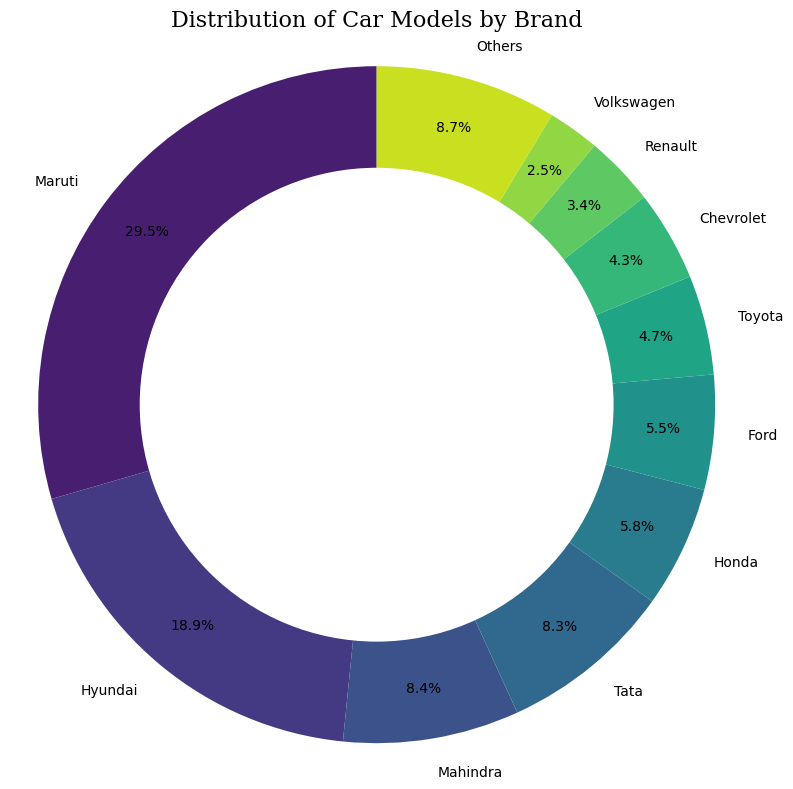

In [15]:
# Step 1: Extract brand names from the 'name' column (assuming the brand is the first word in the name)
df['brand'] = df['name'].str.split().str[0]

# Step 2: Count the number of models by each brand
brand_counts = df['brand'].value_counts()

# Step 3: Create a pie chart
plt.figure(figsize=(8, 8))

# Limit the number of slices for readability (e.g., top 10 brands, group the rest into 'Others')
top_brands = 10
other_brands = brand_counts[top_brands:].sum()  # Summing other brands beyond top N

# Update the brand counts and labels for visualization
brand_labels = brand_counts.index[:top_brands].tolist() + ['Others']
brand_values = brand_counts.values[:top_brands].tolist() + [other_brands]

# Create the pie chart
plt.pie(brand_values, labels=brand_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(brand_labels)),
        pctdistance=0.85)  # Adjust percentage labels' distance from center

# Draw a circle to make the pie chart a donut chart (optional for better readability)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Step 4: Add a title and display the chart
plt.title('Distribution of Car Models by Brand', fontsize=16, family='serif')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


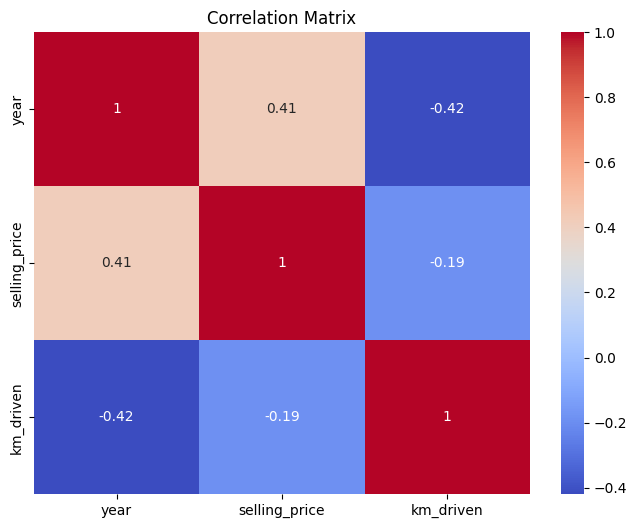

In [17]:
# Correlation matrix for numeric variables
plt.figure(figsize=(8,6))
corr_matrix = df[['year', 'selling_price', 'km_driven']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
#preprocessing_dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical features to numeric using LabelEncoder
le = LabelEncoder()

df['fuel'] = le.fit_transform(df['fuel'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])

# Select features for clustering
X = df[['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This is where 'X_scaled' is defined


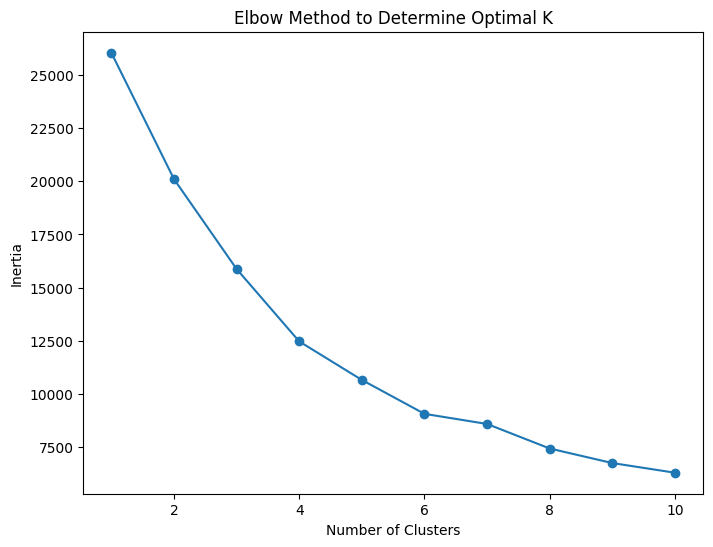

In [22]:
# Elbow method to find optimal K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Use the correctly defined 'X_scaled'
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


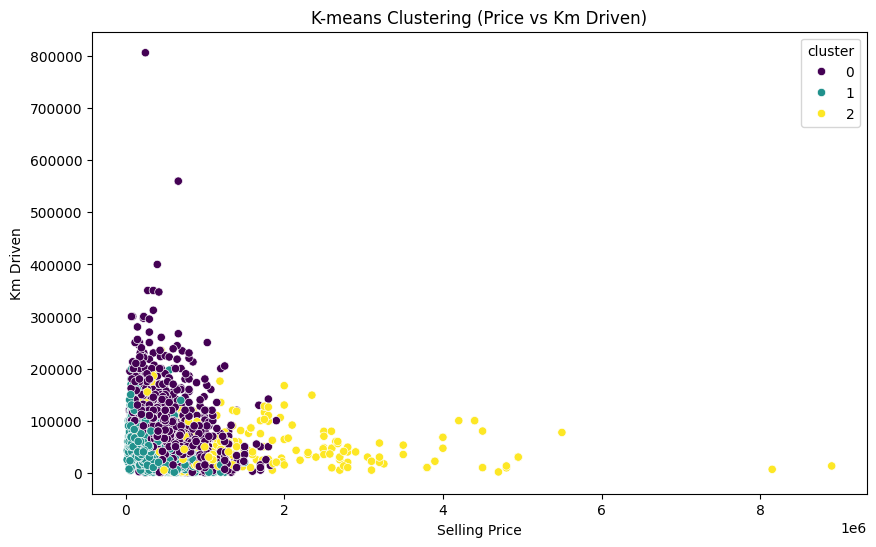

In [23]:
# Set the number of clusters based on the elbow method (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)  # Clustering based on 'X_scaled'

# Visualize the clusters
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='selling_price', y='km_driven', hue='cluster', data=df, palette='viridis')
plt.title('K-means Clustering (Price vs Km Driven)')
plt.xlabel('Selling Price')
plt.ylabel('Km Driven')
plt.show()
